# 使用邊界找尋特徵

#### 匯入圖片，並顯示出來
#### PLT顯示像素順序為BGR，所以顏色會有問題

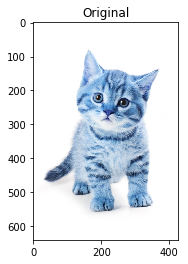

In [210]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("./cat.jpg")


plt.title('Original')
plt.imshow(image)
plt.show()

#### 須將顏色從RGB轉為BGR

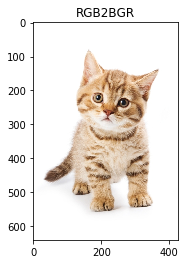

In [211]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #將照片從RGB轉BGR

plt.title('RGB2BGR')
plt.imshow(image)
plt.show()

##### Normalization 將圖片轉為灰階

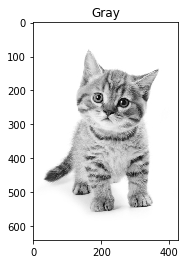

In [212]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#將照片從RGB轉GRAY 灰階

plt.gray()
plt.title('Gray')
plt.imshow(image)
plt.show()

###### Histogram

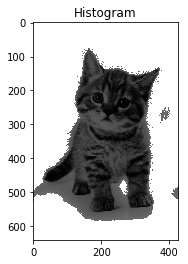

In [213]:
image = cv2.equalizeHist(image)

plt.gray()
plt.title('Histogram')
plt.imshow(image)
plt.show()

##### 將灰階圖片二值化

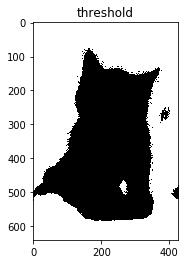

In [214]:
retval, binimg = cv2.threshold(image,0,256,cv2.THRESH_OTSU + cv2.THRESH_BINARY) #二值化

plt.title('threshold')
plt.imshow(binimg)
plt.show()

# Morphological

## StructuringElement
### create Morphology_Extraction kernel

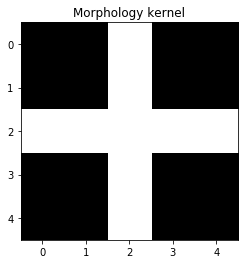

In [215]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
plt.title('Morphology kernel')
plt.imshow(kernel)
plt.show()

### Morphology erosion 侵蝕 (CLOSE)

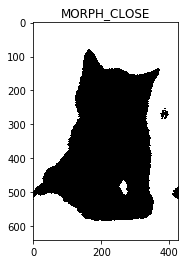

In [216]:
binimgm_close = cv2.morphologyEx(binimg, cv2.MORPH_CLOSE,kernel)

plt.title('MORPH_CLOSE')
plt.imshow(binimgm_close)
plt.show()

### Morphology dilation 擴張 (OPEN) 不沿用侵蝕過後的資料

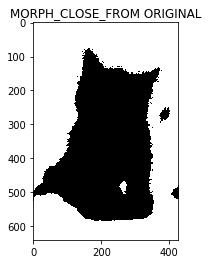

In [217]:
binimgm_open = cv2.morphologyEx(binimg, cv2.MORPH_OPEN,kernel)
plt.title('MORPH_CLOSE_FROM ORIGINAL')
plt.imshow(binimgm_open)
plt.show()

### Morphology dilation 擴張 (OPEN) 沿用侵蝕過後的資料

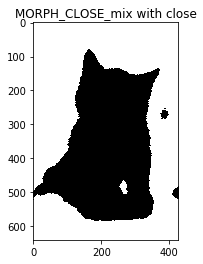

In [218]:
binimgm_open = cv2.morphologyEx(binimgm_close, cv2.MORPH_OPEN,kernel)
plt.title('MORPH_CLOSE_mix with close')
plt.imshow(binimgm_open)
plt.show()

### 使用Canny計算邊界

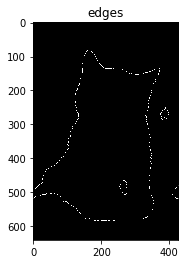

In [219]:
edges = cv2.Canny(binimgm_open,0,250)
plt.title('edges')
plt.imshow(edges)
plt.show()

### Morphology dilation 擴張 (OPEN) 加強邊界 = 描繪輪廓

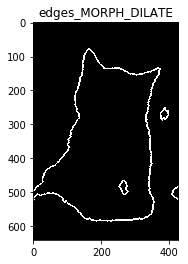

In [220]:
edges = cv2.morphologyEx(edges,cv2.MORPH_DILATE,kernel)
plt.title('edges_MORPH_DILATE')
plt.imshow(edges)
plt.show()

### 將輪廓結合原圖

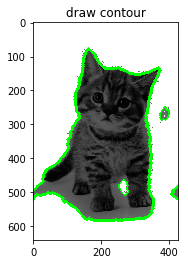

In [221]:
imgcont, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
imgcol = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(imgcol, contours, -1, (0,255,0),3)
plt.title('draw contour')
plt.imshow(imgcol)
plt.show()

### 框出可能有特殊含意的矩形範圍(封閉曲線)

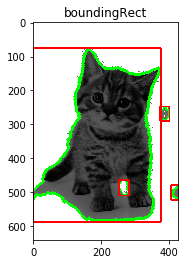

In [222]:
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(imgcol, (x,y), (x+w, y+h), (255,0,0), 3)

plt.title('boundingRect')
plt.imshow(imgcol)
plt.show()